In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

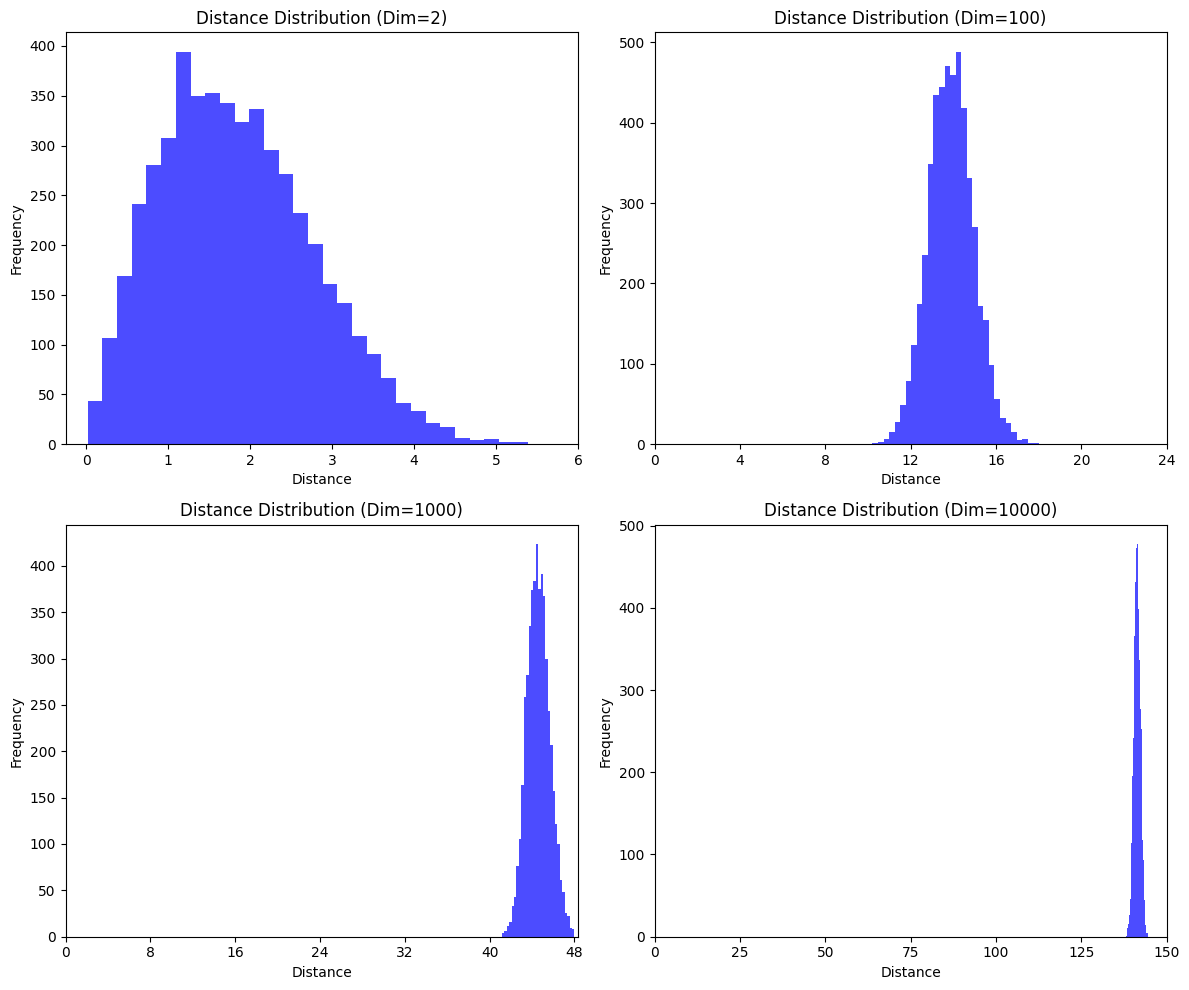

In [ ]:
def prob1():
    
    dist_list = []
    dims = [2, 100, 1000, 10000]

    for dim in dims:
        data = np.random.normal(loc=0, scale=1, size=(100, dim)) 
        dist = pdist(data) 
        dist_list.append(dist)

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    ticks = 6

    for i in range(2):
        for j in range(2):

            ax = axes[i][j]

            id = i*2 + j
            dist = dist_list[id]

            x_ticks = np.linspace(0, np.ceil(np.max(dist) / ticks) * ticks, ticks + 1)
            
            ax.hist(dist, bins=30, alpha=0.7, color="blue")
            ax.set_title(f"Distance Distribution (Dim={dims[id]})")
            ax.set_xlabel("Distance")
            ax.set_ylabel("Frequency")
            ax.set_xticks(x_ticks)

    plt.tight_layout()
    plt.show()

prob1()

In [3]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm

In [4]:
def load_data():

    data_list = []

    for i in range(1, 4):
        train_data = np.load(f'dataset/{i}/train_data.npy') 
        train_label = np.load(f'dataset/{i}/train_label.npy')
        test_data = np.load(f'dataset/{i}/test_data.npy') 
        test_label = np.load(f'dataset/{i}/test_label.npy') 
        data_list.append((train_data, train_label, test_data, test_label))

    return data_list

data_list = load_data()

In [ ]:
def show(data, labels, title, siz=50):

    # 创建新的窗口
    plt.figure()

    unique_labels = np.unique(labels)
    label_names = ['negative', 'neutral', 'positive']
    # label_names = ['Participant 1', 'Participant 2', 'Participant 3']

    cmap = cm.get_cmap('viridis', len(unique_labels))

    for idx, label in enumerate(unique_labels):
        subset = data[labels == label] 
        plt.scatter(subset[:, 0], subset[:, 1], label=label_names[idx], color=cmap(idx), s=siz)

    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.show()

/tmp/ipykernel_1187/1735048908.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(unique_labels))


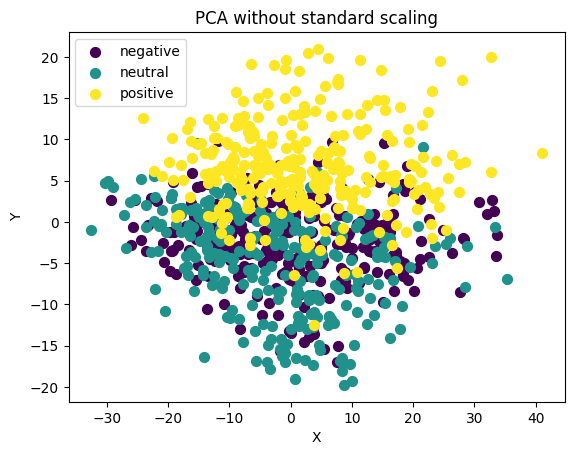

/tmp/ipykernel_1187/1735048908.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(unique_labels))


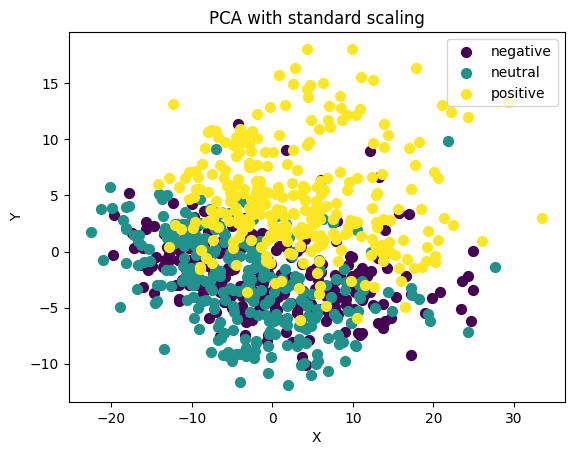

In [6]:
def myPCA(data, siz=50):
    [train_data, train_label, test_data, test_label] = data
    
    # pca不需要label，只需要data
    data = np.concatenate((train_data, test_data))
    labels = np.concatenate((train_label, test_label))

    # 对原本的数据做PCA降维
    pca_org = PCA(n_components=2)
    data_pca_org = pca_org.fit_transform(data)

    show(data_pca_org, labels, "PCA without standard scaling", siz=siz)

    # 对标准化之后的数据做PCA降维
    # 将原本的数据标准化
    scaler = StandardScaler()
    data_std = scaler.fit_transform(data)

    pca_std = PCA(n_components=2)   
    data_pca_std = pca_std.fit_transform(data_std)

    show(data_pca_std, labels, "PCA with standard scaling", siz=siz)
    

myPCA(data_list[0])

/tmp/ipykernel_1187/1735048908.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(unique_labels))


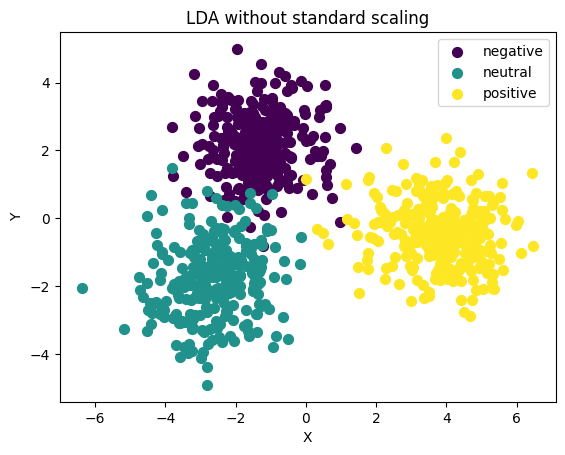

/tmp/ipykernel_1187/1735048908.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(unique_labels))


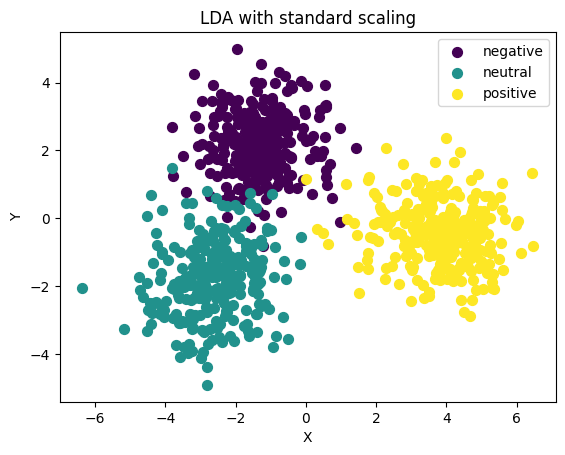

In [7]:
def myLDA(data, siz=50):
    [train_data, train_label, test_data, test_label] = data
    
    data = np.concatenate((train_data, test_data))
    labels = np.concatenate((train_label, test_label))

    # 对原本的数据做LDA降维
    lda_org = LDA(n_components=2)
    data_org = lda_org.fit_transform(data, labels)

    show(data_org, labels, "LDA without standard scaling", siz=siz)

    # 对标准化之后的数据做LDA降维
    # 将原本的数据标准化
    scaler = StandardScaler()
    data_std = scaler.fit_transform(data)
    
    lda_std = LDA(n_components=2)
    data_lda_std = lda_std.fit_transform(data_std, labels)

    show(data_lda_std, labels, "LDA with standard scaling", siz=siz)
    

myLDA(data_list[0])

/tmp/ipykernel_1187/1735048908.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(unique_labels))


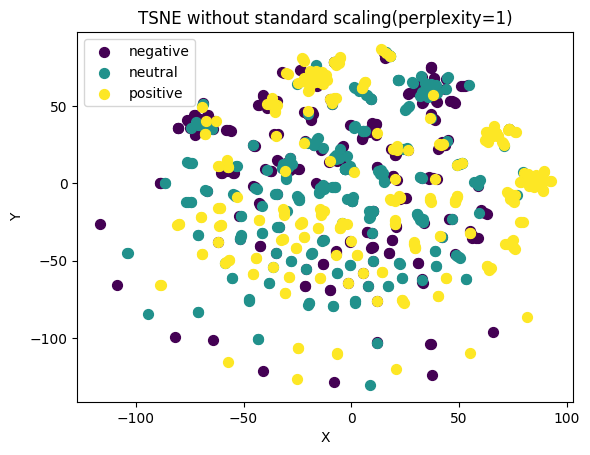

/tmp/ipykernel_1187/1735048908.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(unique_labels))


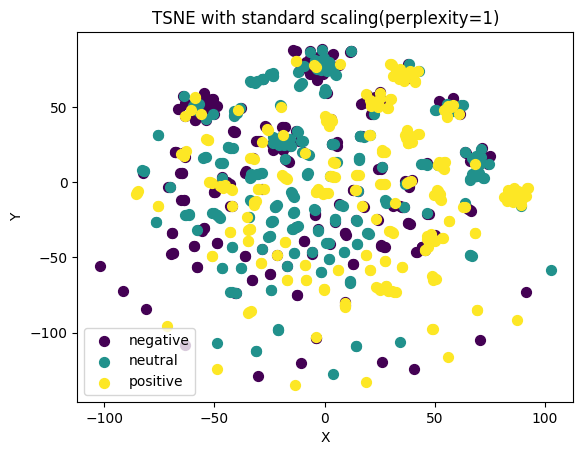

In [8]:
def myTSNE(data, perplexity=30, siz=50):
    [train_data, train_label, test_data, test_label] = data
    
    data = np.concatenate((train_data, test_data))
    labels = np.concatenate((train_label, test_label))

    # 对原本的数据做TSNE降维
    tsne_org = TSNE(n_components=2, perplexity=perplexity)
    data_tsne_org = tsne_org.fit_transform(data)

    show(data_tsne_org, labels, f"TSNE without standard scaling(perplexity={perplexity})", siz=siz)

    # 对标准化之后的数据做TSNE降维
    # 将原本的数据标准化
    scaler = StandardScaler()
    data_std = scaler.fit_transform(data)

    tsne_std = TSNE(n_components=2, perplexity=perplexity) 
    data_tsne_std = tsne_std.fit_transform(data_std)

    show(data_tsne_std, labels, f"TSNE with standard scaling(perplexity={perplexity})", siz=siz)
    

myTSNE(data_list[0], 1)

/tmp/ipykernel_1187/1735048908.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(unique_labels))


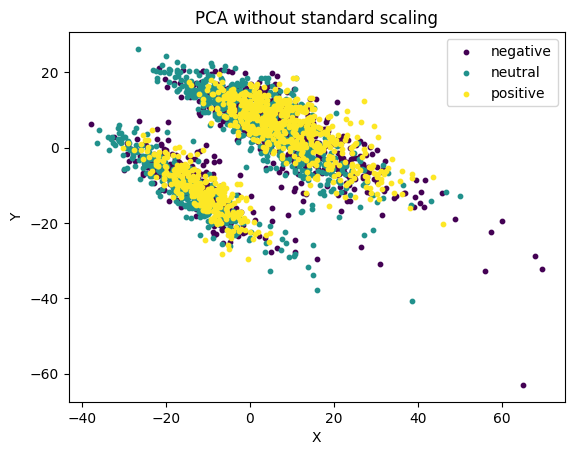

/tmp/ipykernel_1187/1735048908.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(unique_labels))


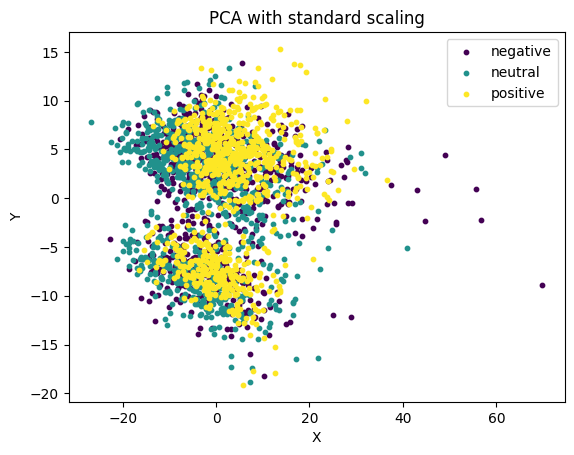

/tmp/ipykernel_1187/1735048908.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(unique_labels))


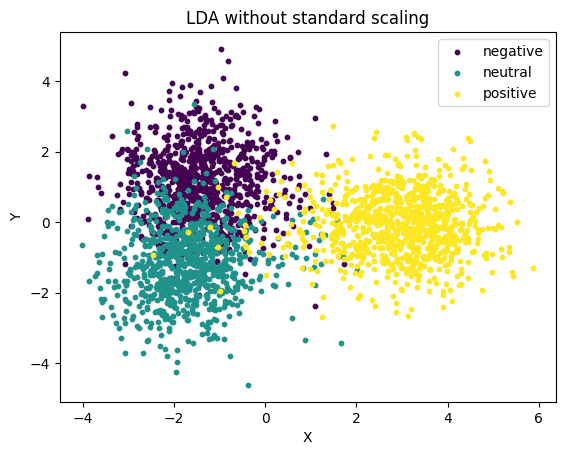

/tmp/ipykernel_1187/1735048908.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(unique_labels))


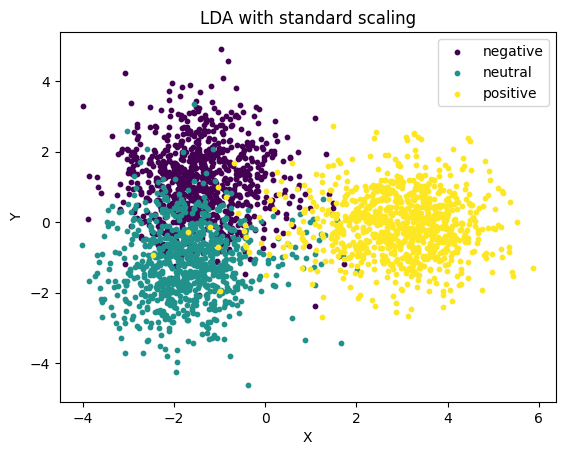

/tmp/ipykernel_1187/1735048908.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(unique_labels))


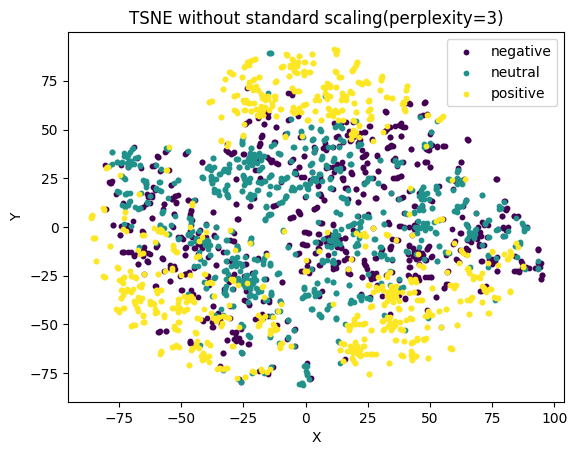

/tmp/ipykernel_1187/1735048908.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(unique_labels))


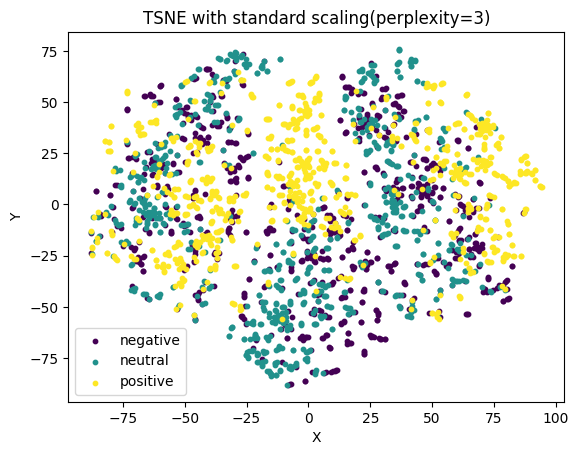

In [9]:
def prob2b():
    
    train_data_list = [item[0] for item in data_list]
    train_label_list = [item[1] for item in data_list]
    test_data_list  = [item[2] for item in data_list]
    test_label_list = [item[3] for item in data_list]

    data = (np.concatenate(train_data_list, axis=0),
            np.concatenate(train_label_list, axis=0),
            np.concatenate(test_data_list, axis=0),
            np.concatenate(test_label_list, axis=0))

    myPCA(data, siz=10)
    myLDA(data, siz=10)
    myTSNE(data, 3, siz=10)

prob2b()

In [10]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format

In [11]:
def output(name, clf, data, label):
    label_pred = clf.predict(data)

    acc = accuracy_score(label, label_pred)
    # prec = precision_score(label, label_pred)
    # rec = recall_score(label, label_pred)
    # f1 = f1_score(label, label_pred)

    # print(f"{name}:")
    # print(classification_report(label, label_pred))
    print(f"{name} : {acc:.3f}")
    # print(f"Precision: {prec:.3f}")
    # print(f"Recall: {rec:.3f}")
    # print(f"F1-score: {f1:.3f}")

In [ ]:
def SVM_test(data, name=""):

    [train_data, train_label, test_data, test_label] = data

    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    Cs = [0.01, 0.1, 1, 2, 5, 10, 20] 

    results = []

    for C in Cs:
        row = []
        for kernel in kernels:
            clf = svm.SVC(kernel=kernel, C=C, gamma='scale')
            clf.fit(train_data, train_label)
            label_pred = clf.predict(test_data)
            acc = accuracy_score(test_label, label_pred)
            # label_pred = clf.predict(train_data)
            # acc = accuracy_score(train_label, label_pred)
            row.append(acc)
            # output(f"SVM {kernel} C={C} {name}", clf, test_data, test_label)
        results.append(row)
            
    df = pd.DataFrame(results, index=Cs, columns=kernels)
    df.index.name = "C"
    df.columns.name = "Kernel"

    print(df)


SVM_test(data_list[0], name="participant 1")


Kernel  linear  poly   rbf  sigmoid
C                                  
0.010    0.655 0.662 0.208    0.208
0.100    0.651 0.651 0.444    0.208
1.000    0.651 0.651 0.673    0.208
2.000    0.651 0.651 0.669    0.208
5.000    0.651 0.651 0.669    0.208
10.000   0.651 0.651 0.662    0.208
20.000   0.651 0.651 0.651    0.208


In [19]:
def mySVM(data, name=""):

    [train_data, train_label, test_data, test_label] = data

    results = []

    clf = svm.SVC(kernel='rbf', C=1, gamma='scale')
    clf.fit(train_data, train_label)
    label_pred = clf.predict(train_data)
    train_acc = accuracy_score(train_label, label_pred)
    label_pred = clf.predict(test_data)
    test_acc = accuracy_score(test_label, label_pred)
    output(f"SVM rbf C=1 {name} train", clf, train_data, train_label)
    output(f"SVM rbf C=1 {name} test", clf, test_data, test_label)
    

mySVM(data_list[0], name="participant 1")
mySVM(data_list[1], name="participant 2")
mySVM(data_list[2], name="participant 3")

SVM rbf C=1 participant 1 train : 0.882
SVM rbf C=1 participant 1 test : 0.673
SVM rbf C=1 participant 2 train : 0.889
SVM rbf C=1 participant 2 test : 0.711
SVM rbf C=1 participant 3 train : 0.903
SVM rbf C=1 participant 3 test : 0.637


In [20]:
from sklearn.neighbors import KNeighborsClassifier

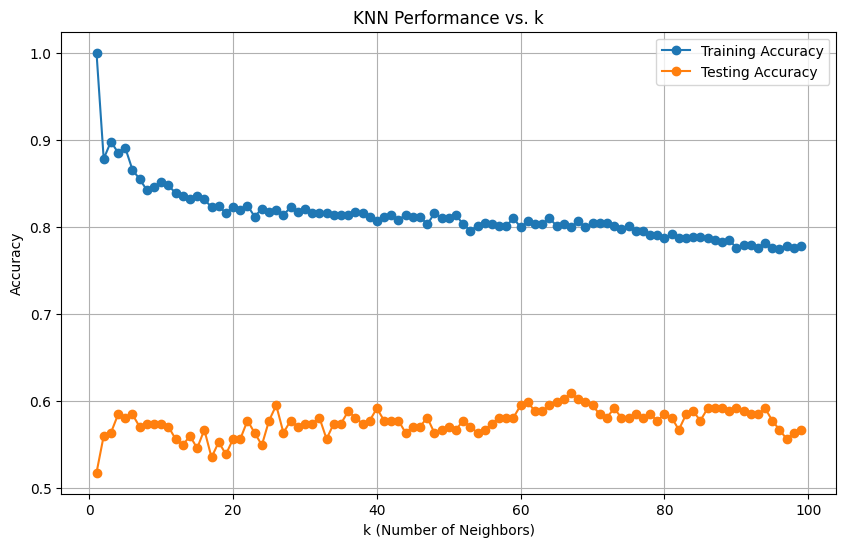

In [36]:
acc_list = []
def KNN_test(data, k=3, name=""):

    [train_data, train_label, test_data, test_label] = data

    scaler = StandardScaler()
    train_data = scaler.fit_transform(train_data)
    test_data = scaler.transform(test_data)

    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(train_data, train_label)

    
    label_pred = clf.predict(train_data)
    train_acc = accuracy_score(train_label, label_pred)
    label_pred = clf.predict(test_data)
    test_acc = accuracy_score(test_label, label_pred)
    acc_list.append((k, train_acc, test_acc))
    # output(f"KNN k={k} {name} train", clf, train_data, train_label)
    # output(f"KNN k={k} {name} test", clf, test_data, test_label)

for k in range(1, 100):
    KNN_test(data_list[0], k=k, name="participant 1")

k_values = [item[0] for item in acc_list]
train_acc = [item[1] for item in acc_list]
test_acc = [item[2] for item in acc_list]

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_acc, marker='o', label='Training Accuracy')
plt.plot(k_values, test_acc, marker='o', label='Testing Accuracy')

plt.title('KNN Performance vs. k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 67


In [38]:
def myKNN(data, k=3, name=""):

    [train_data, train_label, test_data, test_label] = data

    scaler = StandardScaler()
    train_data = scaler.fit_transform(train_data)
    test_data = scaler.transform(test_data)

    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(train_data, train_label)

    
    label_pred = clf.predict(train_data)
    train_acc = accuracy_score(train_label, label_pred)
    label_pred = clf.predict(test_data)
    test_acc = accuracy_score(test_label, label_pred)
    output(f"KNN k={k} {name} train", clf, train_data, train_label)
    output(f"KNN k={k} {name} test", clf, test_data, test_label)

myKNN(data_list[0], k=5, name="participant 1")
myKNN(data_list[1], k=5, name="participant 2")
myKNN(data_list[2], k=5, name="participant 3")


KNN k=5 participant 1 train : 0.891
KNN k=5 participant 1 test : 0.581
KNN k=5 participant 2 train : 0.912
KNN k=5 participant 2 test : 0.634
KNN k=5 participant 3 train : 0.875
KNN k=5 participant 3 test : 0.504
